In [1]:
import json
import gzip
 
reviews=[]    
with gzip.open("reviews_Electronics_5.json.gz", "rb") as f:
    for line in f:
        reviews.append(json.loads(line))
    
    

In [2]:
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def clean(sent):
    sent=sent.lower()
    sent=re.sub('@[^\s]+','',sent)
    sent=re.sub('[/(){}\[\]\|@,;]','',sent)
    sent=re.sub('[^0-9a-z #+_]',' ',sent)
    return sent



{'neg': 0.064, 'neu': 0.87, 'pos': 0.066, 'compound': -0.2774}

In [3]:
import pandas as pd
import networkx as nx
thresh_dist=0.7666 #Gotten from the function

In [4]:
import numpy as np
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
analyser = SentimentIntensityAnalyzer()

G=nx.Graph()


k=5
epsilon=0.02
rows=int(len(reviews[0:10000])/5)
edit_dist=np.zeros([rows,10])


start=time.time()
for r in range(rows):
    
    for i in range(5):
        for j in range(5):
                if i>j:
                    sent1=clean(reviews[k+i]['reviewText'])
                    sent2=clean(reviews[k+j]['reviewText'])
                    max_l=max(len(sent1),len(sent2))
                    
                    if j==0:
                        edit_dist[r][i-1]=nltk.edit_distance(sent1,sent2)/max_l
                        temp=edit_dist[r][i-1]
                    elif j==1:
                        edit_dist[r][i+j+1]=nltk.edit_distance(sent1,sent2)/max_l
                        temp=edit_dist[r][i+j+1]
                    elif j==2:
                        edit_dist[r][i+j+2]=nltk.edit_distance(sent1,sent2)/max_l
                        temp=edit_dist[r][i+j+2]
                    else:
                        edit_dist[r][9]=nltk.edit_distance(sent1,sent2)/max_l
                        temp=edit_dist[r][9]

                    score1 = analyser.polarity_scores(sent1)
                    score2 = analyser.polarity_scores(sent2)
        #             print(score1,score2)
                    if temp<thresh_dist:
                        if abs(score1['neg']-score2['neg'])==0 or abs(score1['pos']-score2['pos'])==0:
    #                         a=data[data.reviewer==reviews[k+i]['reviewerID']]
    #                         b=data[data.reviewer==reviews[k+j]['reviewerID']]


    #                         n_prods=0
    #                         for s in a['ProductIDs']:
    #                             for t in b['ProductIDs']:
    #                                 if s==t:
    #                                     n_prods+=1
                            u=reviews[k+i]['reviewerID']
                            v=reviews[k+j]['reviewerID']
                            print(time.time()-start)
                            try:

                                G[u][v]['weight']=G[u][v]['weight']+1 
    #                         G.add_edge(reviews[k+i]['reviewerID'],reviews[k+j]['reviewerID'],weight=n_prods)
                            except:
                                G.add_edge(u,v,weight=1)

                            print(G[u][v]['weight'])
                        
        
    k+=5
            
print(time.time()-start)


EdgeDataView([(1, 2, {'weight': 2})])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


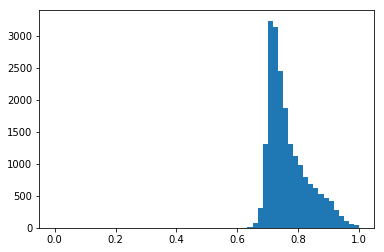

In [7]:
import numpy as np

# edit_dist=np.zeros([1,10])


a=edit_dist[0:,0:].reshape(rows*10)

import matplotlib.pyplot as plt 
plt.hist(a, bins=60)
plt.subplot(111)
plt.show(),a
import cv2
# ret2,th2 = cv2.threshold(edit_dist,0,3500,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



In [8]:
#find Thrshold:

def threshold(array):
    array = np.asarray(array)
    mean=np.mean(array)
    index=(np.abs(array - mean)).argmin()
    print(index)
    return array[index]

thresh_dist=threshold(a)
thresh_dist

1862


0.7664473684210527

2174

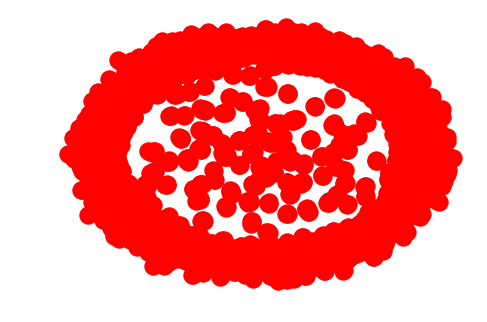

In [9]:
#Create Graph
import networkx as nx
# G=nx.Graph()


# for r in reviews[0:100:5]:
#     G.add_node(r['reviewerID'])

# G.add_edge(1,2)

nx.draw(G, with_labels=False, font_weight='light')

# list(G.edges())[0],[r['reviewerID'] for r in reviews[0:10]]
# reviews[9]['reviewText'],reviews[7]['reviewText']

G.number_of_edges()

In [12]:
# import numpy as np
# import nltk
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# import time
# analyser = SentimentIntensityAnalyzer()

# G=nx.Graph()


# k=5
# epsilon=0.02
# rows=int(len(reviews[0:400])/5)
# edit_dist=np.zeros([rows,5])


# start=time.time()
# for r in range(rows):
#     i=4
#     while(i!=-1):
#         for j in range(5):
#             if i!=j:
#                 sent1=clean(reviews[k+j]['reviewText'])
#                 sent2=clean(reviews[k+i]['reviewText'])
#                 max_l=max(len(sent1),len(sent2))

#                 edit_dist[r][4-i]=nltk.edit_distance(sent1,sent2)/max_l

#                 score1 = analyser.polarity_scores(sent1)
#                 score2 = analyser.polarity_scores(sent2)
#         #             print(score1,score2)
#                 if edit_dist[r][4-i]<0.75:
#                     if abs(score1['neg']-score2['neg'])==0 or abs(score1['pos']-score2['pos'])==0:
# #                         a=data[data.reviewer==reviews[k+i]['reviewerID']]
# #                         b=data[data.reviewer==reviews[k+j]['reviewerID']]
                        

# #                         n_prods=0
# #                         for s in a['ProductIDs']:
# #                             for t in b['ProductIDs']:
# #                                 if s==t:
# #                                     n_prods+=1
#                         u=reviews[k+i]['reviewerID']
#                         v=reviews[k+j]['reviewerID']
#                         print(time.time()-start)
#                         try:
                            
#                             G[u][v]['weight']=G[u][v]['weight']+1 
# #                         G.add_edge(reviews[k+i]['reviewerID'],reviews[k+j]['reviewerID'],weight=n_prods)
#                         except:
#                             G.add_edge(u,v,weight=1)

#                         print(G[u][v]['weight'])
                        
#         i-=1
#     k+=5
            
# print(time.time()-start)


In [13]:
len(edit_dist)

2000

average clustering coefficient: 0.40188108392528277
average degree distribution: 1.7158642462509865
average path length: 1.0929127766477325


(10, 16)

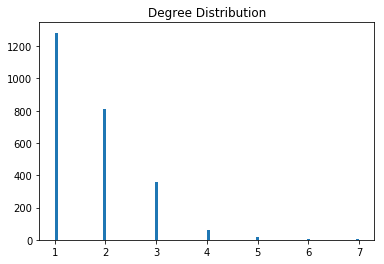

In [14]:
# 4.Global Properties
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
layout = graphviz_layout

acc=nx.average_clustering(G)
avg_dg=nx.average_degree_connectivity(G)
# avg_path_len=nx.average_shortest_path_length(G)


pos=layout(G)

G0=nx.connected_component_subgraphs(G)
G0=sorted(G0, key=len, reverse=True)


#avg_path
avg_path=0
for i,gr in enumerate(G0):
    avg_path+=nx.average_shortest_path_length(gr)/len(G0)

G1=G0[0]    #Giant Component

# plt.subplot(211)
# nx.draw_networkx(G1,pos,edge_color='b', with_labels=False)






dig_dist=dict(nx.degree(G)).values() #Degree Distribution

# plt.hist(dig_dist, bins=100)

dig_dist_np=np.asarray(list(dig_dist))
avg_dig_dist=np.mean(dig_dist_np)


print("average clustering coefficient:",acc)
print("average degree distribution:",avg_dig_dist)

print("average path length:",avg_path)
# print("giant component:",nx.draw_networkx(G1,pos,edge_color='b', with_labels=False))
plt.hist(dig_dist, bins=100)
plt.title('Degree Distribution')
G1.number_of_nodes(),G1.number_of_edges()

2174

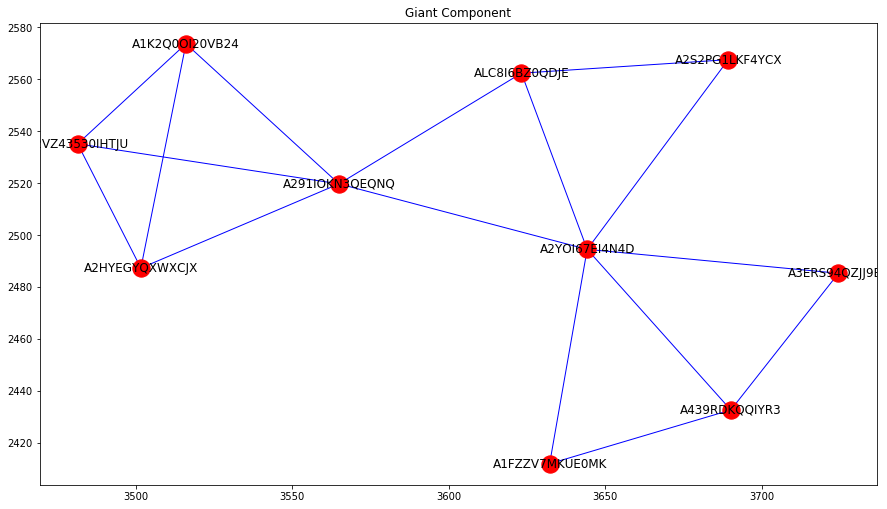

In [18]:
fig = plt.gcf()
fig.set_size_inches(15, 8.5)
# plt.hist(dig_dist, bins=100)

#plot Giant Component
nx.draw_networkx(G1,pos,edge_color='b', with_labels=True)
plt.draw()
plt.title('Giant Component')
G.number_of_edges()

In [19]:
#5.Top 5 centralities
#degree
# top_degree=sorted(nx.degree_centrality(G).values(), reverse=True)
# top_degree=sorted(list(set(top_degree)),reverse=True)


import operator
print("\ntop 5 degree centrality nodes:\n")
i=0


x = nx.degree_centrality(G)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x[0:5])

# for j in range(5):

#     for v in nx.degree_centrality(G):
#         a=nx.degree_centrality(G)[v]
#         if i!=5:
#             if a==top_degree[j]:
#                 print(v,a)
#                 i+=1
        
       
    

# top_bet=sorted(nx.betweenness_centrality(G).values(),reverse=True)
# top_bet=sorted(list(set(top_bet)), reverse=True)

print("\ntop 5 betweenness centrality nodes:\n")
i=0
x = nx.betweenness_centrality(G)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x[0:5])

# for j in range(5):

#     for v in nx.betweenness_centrality(G):
#         a=nx.betweenness_centrality(G)[v]
#         if i!=5:
#             if a==top_bet[j]:
#                 i+=1
#                 print(v,a)
            
            


# top_eig=sorted(nx.eigenvector_centrality(G).values(),reverse=True)
# top_eig=sorted(list(set(top_eig)),reverse=True)
print("\ntop 5 eigenvector centrality nodes:\n")
i=0

x = nx.eigenvector_centrality(G,max_iter=1000)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x[0:5])


# for j in range(5):
#     for v in nx.eigenvector_centrality(G):

#         a=nx.eigenvector_centrality(G)[v]
#         if i!=5:
#             if a==top_eig[j]:
#                 i+=1
#                 print(v,a)

top_close=sorted(nx.closeness_centrality(G).values(),reverse=True)
# top_close=sorted(list(set(top_close)),reverse=True)

print("\ntop 5 closeness centrality nodes:\n")
i=0

# for j in range(5):
#     for v in nx.closeness_centrality(G):
#         a=nx.closeness_centrality(G)[v]
#         if i!=5:
#             if a==top_close[j]:
#                 i+=1
#                 print(v,a)
                

x = nx.closeness_centrality(G)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x[0:5])            
        



top 5 degree centrality nodes:

[('A32T9TM5F7KHIG', 0.0027635215159889457), ('A2TICS1YPCDLKA', 0.0027635215159889457), ('A3CFH7IL0GL187', 0.0023687327279905248), ('A2YOI67EI4N4D', 0.0023687327279905248), ('A1IGVPJTW1ED3W', 0.0023687327279905248)]

top 5 betweenness centrality nodes:

[('A2YOI67EI4N4D', 6.392709442312502e-06), ('A2BAKWNFT9N7L5', 6.236789699817075e-06), ('A22QIJY2CB21MV', 5.924950214826221e-06), ('A2VNAGUP6GD6ZW', 5.6131107298353676e-06), ('A291IOKN3QEQNQ', 5.6131107298353676e-06)]

top 5 eigenvector centrality nodes:

[('A3CFH7IL0GL187', 0.3416899639067221), ('A3GZQJZLSMETLI', 0.3416899639067221), ('A1EAN2SFKYBJ05', 0.2993771591206689), ('AI43VKPN5NF7D', 0.2993771591206689), ('A13HO1F4SW568P', 0.2993771591206689)]

top 5 closeness centrality nodes:

[('A2TICS1YPCDLKA', 0.002807386936877659), ('A32T9TM5F7KHIG', 0.0027635215159889457), ('A2YOI67EI4N4D', 0.0026648243189893407), ('A291IOKN3QEQNQ', 0.0024598378329132374), ('A1IGVPJTW1ED3W', 0.0024180813264903277)]


In [20]:
# Get out the reviews:
# A24VVE3E7D4GVQ
k=0
for r in range(10000):
    if reviews[k]['reviewerID']=='A2TICS1YPCDLKA':
        
        print(reviews[k]['reviewText'],'\nProductID '+reviews[k]['asin'])
    
    if reviews[k]['reviewerID']=='A32T9TM5F7KHIG':
        
        print('\n'+reviews[k]['reviewText'],'\nProductID '+reviews[k]['asin'])
        
    if reviews[k]['reviewerID']=='A2YOI67EI4N4D':
        
        print('\n'+reviews[k]['reviewText'],'\nProductID '+reviews[k]['asin'])
        
        
    k+=1



Needed a shorter cable to hook things up around the TV to a router.  Cable is good quality and works perfectly fine. 
ProductID B00000J1V5

Needed a short CAT5 cable to hook up a TV from a router and this fit the bill perfectly.  Cable is good quality and works perfectly fine. 
ProductID B00000JDF5

I've used these labels to do my filing. It's a lot neater and easier to read my files. It's the way to go. 
ProductID B00000K135

I've been using this method of labeling for quite some time now and I find that it's alot neater than wriring. 
ProductID B00000K13L
Monster surge protectors and power strips are excellent and offer plenty of outlet space.  Bought three for my home office and they are doing the job with ease.  I absolutely would recommend them to anyone. 
ProductID B00003CWDH
These were on sale and obviously they are top notch.  I bought three of them for my office, and they are excellent surge protectors and power strips.  I definitely would gladly recommend these. 
ProductID B

2872

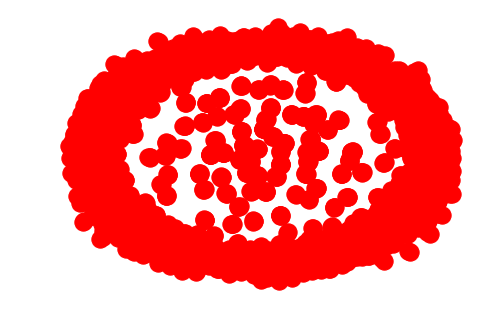

In [27]:
#6 Communities
from networkx.algorithms import community



communities_generator = community.girvan_newman(G)
# nx.draw_networkx(communities_generator)
next_level_communities = next(communities_generator)
c=list(map(sorted, next_level_communities))

F=nx.Graph()
# F.add_nodes_from(c)
for n in c:
    for i in range(len(n)):
        for j in range(len(n)):
            if i!=j:
                F.add_edge(n[i],n[j])

nx.draw(F,with_labels=False)
F.number_of_edges()


In [39]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
greedy=list(sorted(communities))
k=0
for r in range(10000):
    for name in list(greedy[0]):
    
        if reviews[k]['reviewerID']==name:
        
            print(reviews[k]['reviewText'],'\nProductID '+reviews[k]['asin'], name+'\n')
    k+=1

Once you see the price of these in stores you will appreciate the great prices here. Ordered two of these and they work great and the snagless feature is a real plus. Ordered two more to keep for back up. The different colors are nice also for identifying different computers or whatever you are using. 
ProductID B00000J1V5 ALC8I6BZ0QDJE

Not much to say about ethernet cables. I wanted a mix of different sizes as I rearranged my office, and it was easy to find on Amazon.com. 
ProductID B00000J1V5 A291IOKN3QEQNQ

Needed a shorter cable to hook things up around the TV to a router.  Cable is good quality and works perfectly fine. 
ProductID B00000J1V5 A2YOI67EI4N4D

They are inexpensive, flexible, and work just fine.  I'm just using them in mundane applications.  Don't know how they'd work in high speed applications. 
ProductID B00000J1V5 A2S2PG1LKF4YCX

Good qualtiy with well-designed connectors.  Extremely useful for short-disstance connections between router and other equipment.Purchase

In [28]:
sorted(c[0])

['A1EDI0X3GI1SK7', 'A3UOSOCRKS3WIH', 'AVRFGGCCCR6QU']

In [35]:
# K Clique 
from networkx.algorithms.community import k_clique_communities

k_clic=list(k_clique_communities(G, 5))
k=0
for r in range(10000):
    for name in list(k_clic[0]):
    
        if reviews[k]['reviewerID']==name:
        
            print(reviews[k]['reviewText'],'\nProductID '+reviews[k]['asin'], name)
    k+=1


I have an old model P-Touch but it works excellent. I've had it for many years and have never had a problem with it. Glad to still be able to find tape cartridges. 
ProductID B00000K135 A2MXK2BL6EFOPR
i have a PT-65 and works great - the tape i received is a genuine Brother product.products like these keep you on top of your GTD implementation! 
ProductID B00000K135 A38WZ0ITR34AFN
Works great.  Make sure you have the correct size - there are at least 2 different size tapes (M & TZ) and they are not interchangeable. 
ProductID B00000K135 A4ZGPH50QWA1F
love this and the silver refills  i see alot of reorders in the future!!! 
ProductID B00000K135 A3GZQJZLSMETLI
Brother has hit a home run with their labeling tape systems.I used to spin the old Dynamo labeler to make labels but nomore. 
ProductID B00000K135 A4RASGC2BYMD5
this is the color and refills i will always reorder it makes the disc look so professional when you mark a disc with it!!!!!! love it!! 
ProductID B00000K13L A3GZQJZLSMETL

In [23]:
ratings = pd.read_csv('ratings_Electronics.csv', sep = ',',header=None, index_col = False, names=['0','1','2','3'])

In [24]:
data=pd.DataFrame()
data['ratings']=ratings['2']
data['ProductIDs']=ratings['1']
data['reviewer']=ratings['0']
data['Timex']=ratings['3']


In [25]:
# data.query('ProductIDs=="0511189877"')
a=data.query('reviewer=="A1FZZV7MKUE0MK"')
b=data.query('reviewer=="A1K2Q0OI20VB24"')

for name in sorted(communities[0]):
    print(data[data.reviewer==name])
# n_prods=0
# for s in a['ProductIDs']:
#     for k in b['ProductIDs']:
#         if s==k:
#             n_prods+=1


NameError: name 'communities' is not defined

In [362]:
n_prods

1

In [327]:
name='AKM1MP6P0OYPR'

In [330]:
data[data.reviewer==name]

,ratings,ProductIDs,reviewer,Timex
0,5.0,0132793040,AKM1MP6P0OYPR,1365811200
5200191,5.0,B005UEB5TQ,AKM1MP6P0OYPR,1366243200
